In [3]:
import numpy as np
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics

In [4]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [5]:
df= pd.read_csv("Capstone.csv")

In [6]:
df.shape

(2940, 35)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.nunique()
#We have lot of catogorical varibales available

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              2940
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [10]:
df.Attrition.unique()
# We have yes and No as dependent variable

array(['Yes', 'No'], dtype=object)

In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

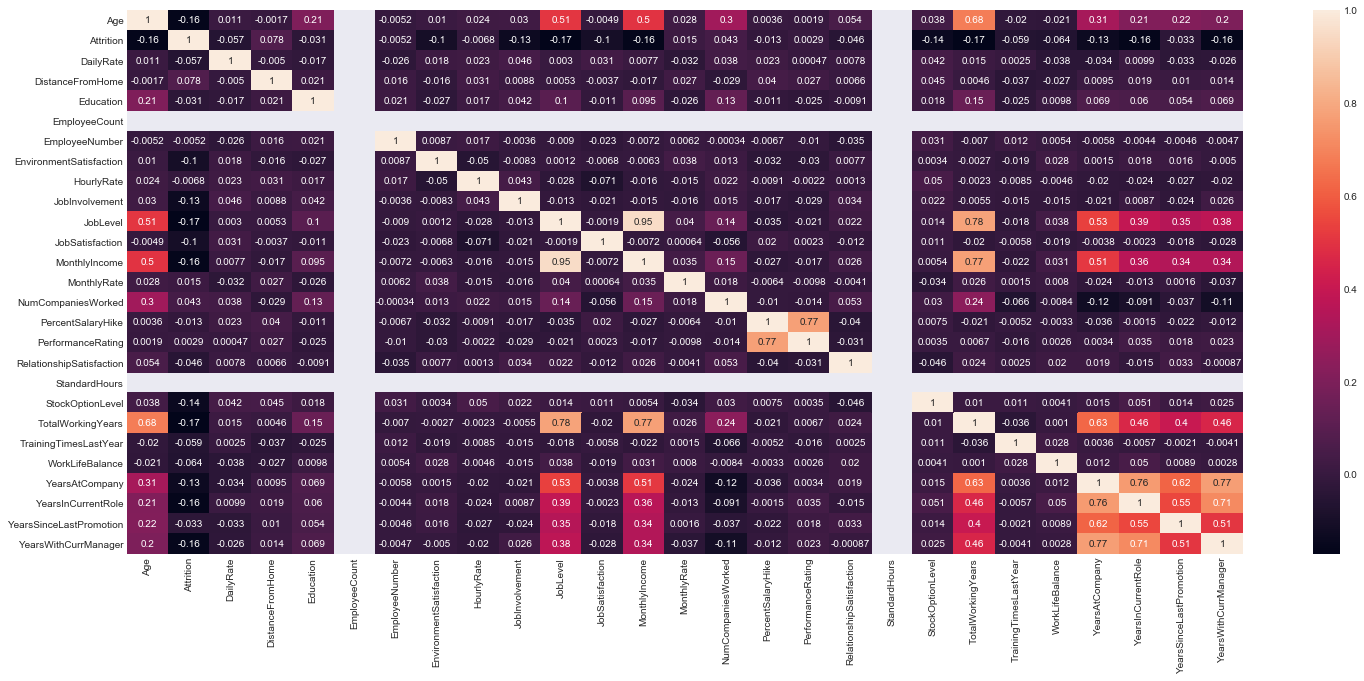

In [13]:
#corelation between the coloumns
plt.figure(figsize=(25, 10))
corr = df.corr(method="pearson")
sns.heatmap(corr, annot=True)

In [14]:
#Strong Corelation between 
#1. Monthly income and Job Level
#2. Total working years and Job Level
#3. Performance Rating and Percentage Salary Hike
#4. YearsWithCurrentManager and YearswithCompany
#5  totalWorkingYears and Job level
# I am not dropping the corelated columns, depending upon the ML algorith I will decide to drop or not.

In [15]:
#removing outliers
col = ['DailyRate', 'EmployeeNumber', 'MonthlyRate']
def remove_outlier(Column_Name):
    q75 = df[Column_Name].quantile([.75])
    q75 = q75.values[0]
    q25 = df[Column_Name].quantile([.25])
    q25 = q25.values[0]
    IQR = q75-q25
    wlu = q75 + 1.5*IQR
    wll = q25-1.5*IQR
    count =  df[Column_Name][(df[Column_Name] > wlu ) | (df[Column_Name] < wll )].count()
    print("Total Outliers for " + Column_Name, count)
    df.loc[df[Column_Name]> wlu, Column_Name] = np.nan # replacing the outliers with NAN values
    df.loc[df[Column_Name]< wll, Column_Name] = np.nan # replacing the outliers with NAN values
    df[Column_Name].fillna(df[Column_Name].median(),inplace=True)

for i in col:
        remove_outlier(i)
print("Outliers Removed")

Total Outliers for DailyRate 0
Total Outliers for EmployeeNumber 0
Total Outliers for MonthlyRate 0
Outliers Removed


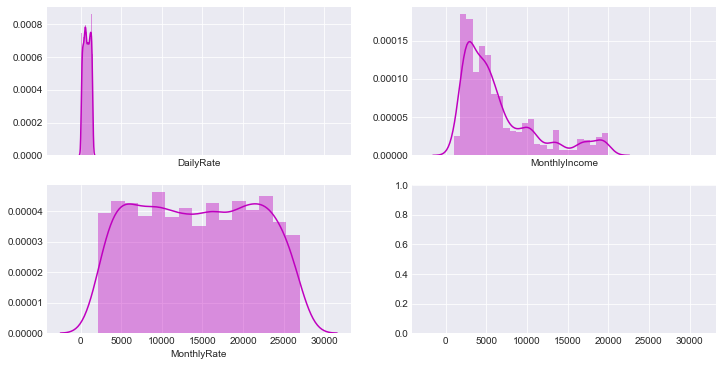

In [16]:
# No Outliers Found
plt.figure(figsize=(32, 10))
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, sharex=True)
sns.despine(left=True)
sns.distplot(df.DailyRate, color="m", ax=axes[0, 0])
sns.distplot(df.MonthlyIncome, color="m", ax=axes[0, 1])
sns.distplot(df.MonthlyRate, color="m", ax=axes[1, 0])

In [17]:
#lable encoding
le = preprocessing.LabelEncoder()
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Over18'] = le.fit_transform(df['Over18'])
df['OverTime'] = le.fit_transform(df['OverTime'])

In [18]:
#calling Rondom Forest to determine the 
fit_rf = RandomForestClassifier(random_state=42)

In [19]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [20]:
feature_space = df.iloc[:, df.columns != 'Attrition']
feature_class = df.iloc[:, df.columns == 'Attrition']

In [21]:
fit_rf.fit(feature_space, feature_class)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [22]:
var_imp_rf = variable_importance(fit_rf)
importances_rf = var_imp_rf['importance']
indices_rf = var_imp_rf['index']
names_index = df.columns[2:]

In [23]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]-1],
                      importance[indices[f]]))

In [24]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'MonthlyIncome' has a Mean Decrease in Impurity of 0.05946
2. The feature 'TotalWorkingYears' has a Mean Decrease in Impurity of 0.05824
3. The feature 'YearsWithCurrManager' has a Mean Decrease in Impurity of 0.05775
4. The feature 'DailyRate' has a Mean Decrease in Impurity of 0.05450
5. The feature 'OverTime' has a Mean Decrease in Impurity of 0.05348
6. The feature 'MonthlyRate' has a Mean Decrease in Impurity of 0.04898
7. The feature 'DistanceFromHome' has a Mean Decrease in Impurity of 0.04707
8. The feature 'HourlyRate' has a Mean Decrease in Impurity of 0.04556
9. The feature 'PercentSalaryHike' has a Mean Decrease in Impurity of 0.03737
10. The feature 'YearsWithCurrManager' has a Mean Decrease in Impurity of 0.03717
11. The feature 'YearsAtCompany' has a Mean Decrease in Impurity of 0.03615
12. The feature 'JobRole' has a Mean Decrease in Impurity of 0.03378
13. The feature 'NumCompaniesWorked' has a Mean Decrease in Impurity of 0.03290
14. Th

In [25]:
#lets find the important variables
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index)+1)

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]-1])

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_axis_bgcolor('#fafafa')
    plt.title('Feature importances')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


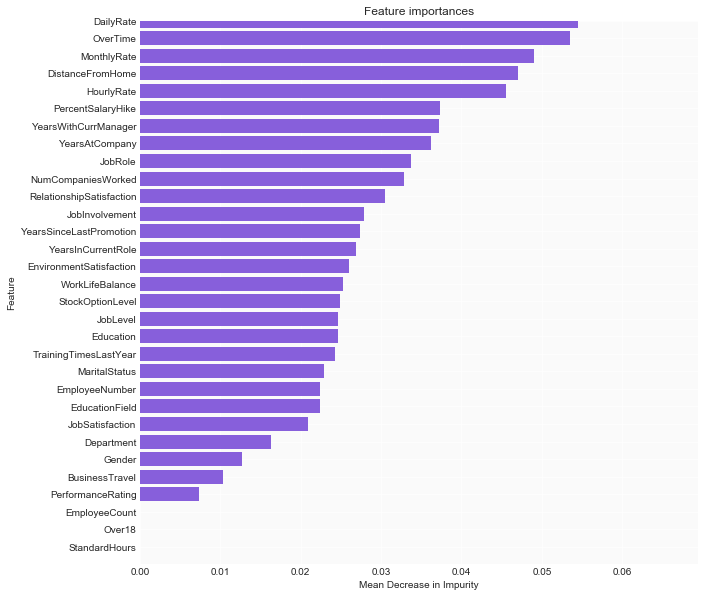

In [26]:
plt.figure(figsize=(32, 10))
variable_importance_plot(importances_rf, indices_rf, names_index)

In [27]:
#these are the important features in the dataset
#Time To decide which algorithm to use 
#Algorithm can not be used  : KNN(Klustering),Bayes(Text Classification), Regression(Cont. Values)
#Algorithms can be used : Decisition Tree, Rondom Forest, SVM, 

# Rondom Forest

In [29]:
#lets do this with Rondom Forest (If the business does not bother about the process)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(feature_space, feature_class, test_size=0.2, random_state=42) 
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [88]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  19.91


In [89]:
fit_rf.set_params(bootstrap = True,
                  criterion = 'entropy',
                  max_features = None,
                  max_depth = 4)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [90]:
#OBB is not possible in the case of max_features NONE.
predictions_rf = fit_rf.predict(X_test)

In [91]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

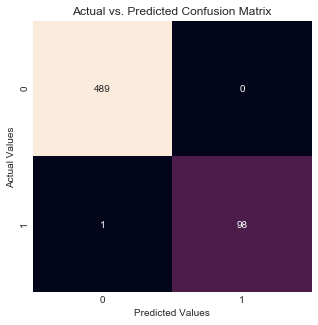

In [92]:
plt.figure(figsize=(5, 5))
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [93]:
accuracy_rf = fit_rf.score(X_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.998


In [94]:
    print(classification_report(predictions_rf, 
            y_test, 
            target_names = df))

                          precision    recall  f1-score   support

                     Age       1.00      1.00      1.00       490
               Attrition       0.99      1.00      0.99        98

             avg / total       1.00      1.00      1.00       588



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 2, does not match size of target_names, 2940
  .format(len(labels), len(target_names))


# Decisition Tree

In [100]:
# Decision tree with depth = 2
model_dept_2 = DecisionTreeClassifier(max_depth=2, random_state=1)
model_dept_2.fit(X_train, y_train)
model_dept_2_score = model_dept_2.score(X_train, y_train)
print("Training Score = ", model_dept_2_score)
model_dept_2_test_score = model_dept_2.score(X_test, y_test)
print("Test Score = ", model_dept_2_test_score)

Training Score =  0.8601190476190477
Test Score =  0.8452380952380952


In [102]:
# Decision tree with depth = 4
model_dept_4 = DecisionTreeClassifier(max_depth=4, random_state=1)
model_dept_4.fit(X_train, y_train)
model_dept_4_score = model_dept_4.score(X_train, y_train)
print("Training Score = ", model_dept_4_score)
model_dept_4_test_score = model_dept_4.score(X_test, y_test)
print("Test Score = ", model_dept_4_test_score)

Training Score =  0.8775510204081632
Test Score =  0.8605442176870748


In [103]:
# Decision tree with depth = 8
model_dept_8 = DecisionTreeClassifier(max_depth=8, random_state=1)
model_dept_8.fit(X_train, y_train)
model_dept_8_score = model_dept_8.score(X_train, y_train)
print("Training Score = ", model_dept_8_score)
model_dept_8_test_score = model_dept_8.score(X_test, y_test)
print("Test Score = ", model_dept_8_test_score)

Training Score =  0.9549319727891157
Test Score =  0.9081632653061225


In [114]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth = 8)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict_proba(X_test)[:, 1]

In [123]:
plt.figure(figsize=(6,6))
dot_data = StringIO()
export_graphviz(model_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png()) #This line is not working becasue of Graphviz library

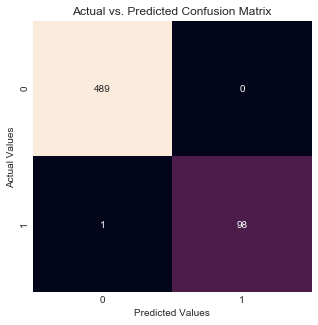

In [124]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

plt.figure(figsize=(5, 5))
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

# SVM

In [31]:
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8316326530612245


In [147]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8486394557823129


In [ ]:
#It is taking too much time to execute so leaving it here
"""svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))"""

In [ ]:
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)  
